In [68]:
# Bike Sharing Demand prediction Project for the hourly dataset
# 
# Prerequisites
# - Knowledge of basic Python
# - Statistics
# - Data Processing
# - Multiple Linear regression

In [69]:
# ----------------------------------------------
# Step 0 - Import Libraries
# ----------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [70]:
# ----------------------------------------------
# Step 1 - Read the data
# ----------------------------------------------
bikes = pd.read_csv('/Users/xujiayi/Downloads/hour.csv')

In [71]:
bikes.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [72]:
bikes.shape

(17379, 17)

In [73]:
bikes.describe()

,index,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


/Users/xujiayi/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/xujiayi/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/xujiayi/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/xujiayi/opt/anac

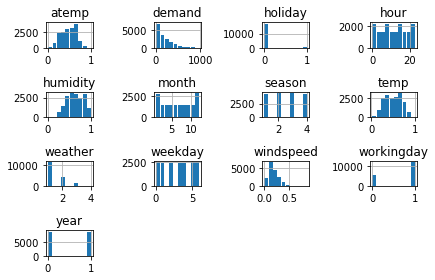

In [74]:
# ----------------------------------------------
# Step 2 - Prelim Analysis and Feature selection
# ----------------------------------------------
bikes_prep = bikes.copy()
bikes_prep = bikes_prep.drop(['index', 'date', 'casual', 'registered'], axis=1)
## index, date ,casual, regiester are not used for the prediction use.

bikes_prep.isnull().sum()

# Create pandas histogram
bikes_prep.hist(rwidth = 0.9)
plt.tight_layout()


In [75]:
bikes_prep.shape

(17379, 13)

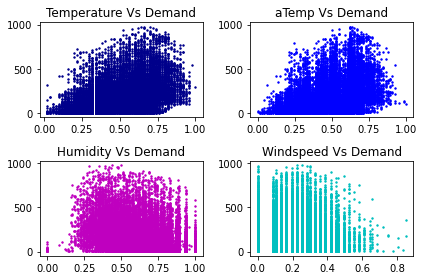

In [76]:
# ----------------------------------------------
# Step 3 - Data Visualisation
# ----------------------------------------------
#
# Visualise the continuous features Vs demand
plt.subplot(2,2,1)
plt.title('Temperature Vs Demand')
plt.scatter(bikes_prep['temp'], bikes_prep['demand'], s=2, c='darkblue')

plt.subplot(2,2,2)
plt.title('aTemp Vs Demand')
plt.scatter(bikes_prep['atemp'], bikes_prep['demand'], s=2, c='b')

plt.subplot(2,2,3)
plt.title('Humidity Vs Demand')
plt.scatter(bikes_prep['humidity'], bikes_prep['demand'], s=2, c='m')

plt.subplot(2,2,4)
plt.title('Windspeed Vs Demand')
plt.scatter(bikes_prep['windspeed'], bikes_prep['demand'], s=2, c='c')

plt.tight_layout()


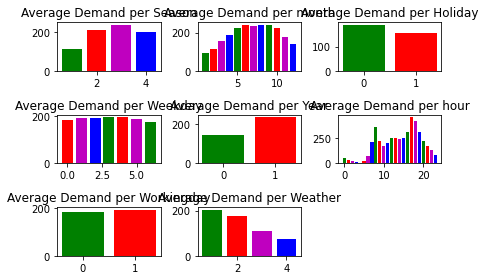

In [77]:
# Visualise the categorical features
colors = ['g', 'r', 'm', 'b']

# create a 3 x 3 subplot
plt.subplot(3,3,1)
plt.title('Average Demand per Season')
# create a list of unique season's values
cat_list = bikes_prep['season'].unique()
# create average demand per season using grouby
cat_average = bikes_prep.groupby('season').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,2)
plt.title('Average Demand per month')
cat_list = bikes_prep['month'].unique()
cat_average = bikes_prep.groupby('month').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,3)
plt.title('Average Demand per Holiday')
cat_list = bikes_prep['holiday'].unique()
cat_average = bikes_prep.groupby('holiday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,4)
plt.title('Average Demand per Weekday')
cat_list = bikes_prep['weekday'].unique()
cat_average = bikes_prep.groupby('weekday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,5)
plt.title('Average Demand per Year')
cat_list = bikes_prep['year'].unique()
cat_average = bikes_prep.groupby('year').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,6)
plt.title('Average Demand per hour')
cat_list = bikes_prep['hour'].unique()
cat_average = bikes_prep.groupby('hour').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,7)
plt.title('Average Demand per Workingday')
cat_list = bikes_prep['workingday'].unique()
cat_average = bikes_prep.groupby('workingday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,8)
plt.title('Average Demand per Weather')
cat_list = bikes_prep['weather'].unique()
cat_average = bikes_prep.groupby('weather').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.tight_layout()


<BarContainer object of 24 artists>

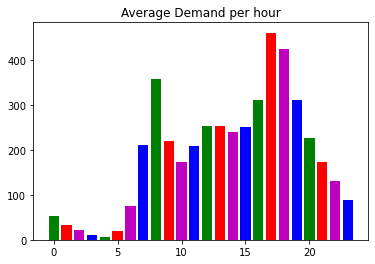

In [78]:
plt.title('Average Demand per hour')
cat_list = bikes_prep['hour'].unique()
cat_average = bikes_prep.groupby('hour').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)


## Data visualization analysis result 
### Continous features

- Demand is not normally distributed
- Temperature and demand appears to have direct corrleation
- The plot for temp and atemp appear almost identical
- Humidity and wind speed affect demand but need more statistical analysis

### Categorical features

- There is variation in demand based on  
   - Season
   - Month
   - Holiday
   - Hour
   - Weather
   
- No significant change in demand due to weekday or working day
- Year-wise growth pattern not considered due to limited number of years

In [79]:
# Check for outliers
bikes_prep['demand'].describe()


count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

In [80]:
bikes_prep['demand'].quantile([0.05, 0.1, 0.15, 0.9, 0.95, 0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

In [81]:
# ------------------------------------------------------
# Step 4 - Check Multiple Linear Regression Assumptions
# ------------------------------------------------------

# Linearity using correlation coefficient matrix using corr
correlation = bikes_prep[['temp', 'atemp', 'humidity', 'windspeed', 'demand']].corr()
correlation

,temp,atemp,humidity,windspeed,demand
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
demand,0.404772,0.400929,-0.322911,0.093234,1.000000


In [82]:

# Step 5 - Drop irrelevant features
bikes_prep = bikes_prep.drop(['weekday', 'year', 'workingday', 'atemp', 'windspeed'], axis=1)

In [83]:
bikes_prep 

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,16
1,1,1,1,0,1,0.22,0.80,40
2,1,1,2,0,1,0.22,0.80,32
3,1,1,3,0,1,0.24,0.75,13
4,1,1,4,0,1,0.24,0.75,1
...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,119
17375,1,12,20,0,2,0.26,0.60,89
17376,1,12,21,0,1,0.26,0.60,90
17377,1,12,22,0,1,0.26,0.56,61


(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474708, 0.4704955 , 0.49622798, 0.49404052, 0.4679593 ,
        0.47732034, 0.52675766, 0.59145737, 0.6520156 , 0.7151954 ,
        0.80591017, 0.92530966, 1.        , 0.92530966, 0.80591017,
        0.7151954 , 0.6520156 , 0.59145737, 0.52675766, 0.47732034,
        0.4679593 , 0.49404052, 0.49622798, 0.4704955 , 0.45474708],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x7f935f76aa50>)

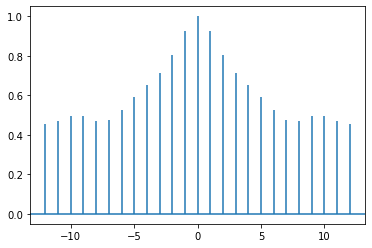

In [84]:
# Autocorrelation of demand using acor
dff1 = pd.to_numeric(bikes_prep['demand'], downcast='float')
plt.acorr(dff1, maxlags=12)

<AxesSubplot:>

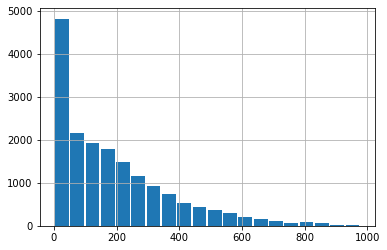

In [85]:
# ------------------------------------------------------
# Step 6 - Create/Modify new features
# ------------------------------------------------------
# Log Normalise the feature 'Demand'
df1 = bikes_prep['demand']
df2 = np.log(df1)

plt.figure()
df1.hist(rwidth=0.9, bins=20)


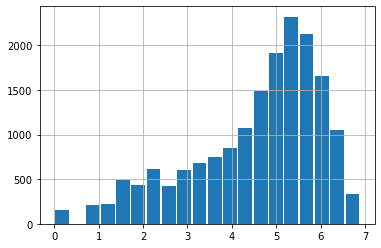

In [86]:
plt.figure()
df2.hist(rwidth=0.9, bins=20)

bikes_prep['demand'] = np.log(bikes_prep['demand'])


In [87]:
# Solve the problem of Autocorrelation
# Shift the demand by 3 lags

t_1 = bikes_prep['demand'].shift(+1).to_frame()
t_1.columns = ['t-1']

t_2 = bikes_prep['demand'].shift(+2).to_frame()
t_2.columns = ['t-2']

t_3 = bikes_prep['demand'].shift(+3).to_frame()
t_3.columns = ['t-3']

bikes_prep_lag = pd.concat([bikes_prep, t_1, t_2, t_3], axis=1)

bikes_prep_lag = bikes_prep_lag.dropna()

In [88]:
bikes_prep_lag

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,1,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736
6,1,1,6,0,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949
7,1,1,7,0,1,0.20,0.86,1.098612,0.693147,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,4.779123,4.804021,5.099866,5.365976
17375,1,12,20,0,2,0.26,0.60,4.488636,4.779123,4.804021,5.099866
17376,1,12,21,0,1,0.26,0.60,4.499810,4.488636,4.779123,4.804021
17377,1,12,22,0,1,0.26,0.56,4.110874,4.499810,4.488636,4.779123


In [89]:
# -----------------------------------------------------------------------------
# Step 7 - Create Dummy Variables and drop first to avoid dummy variables trap
# -----------------------------------------------------------------------------
# - season
# - holiday
# - weather
# - month
# - hour
#
# Using get_dummies
#

In [90]:
bikes_prep_lag.dtypes


season        int64
month         int64
hour          int64
holiday       int64
weather       int64
temp        float64
humidity    float64
demand      float64
t-1         float64
t-2         float64
t-3         float64
dtype: object

In [91]:
bikes_prep_lag['season'] = bikes_prep_lag['season'].astype('category')
bikes_prep_lag['holiday'] = bikes_prep_lag['holiday'].astype('category')
bikes_prep_lag['weather'] = bikes_prep_lag['weather'].astype('category')
bikes_prep_lag['month'] = bikes_prep_lag['month'].astype('category')
bikes_prep_lag['hour'] = bikes_prep_lag['hour'].astype('category')

bikes_prep_lag = pd.get_dummies(bikes_prep_lag, drop_first=True)



In [92]:
bikes_prep_lag

,temp,humidity,demand,t-1,t-2,t-3,season_2,season_3,season_4,month_2,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.26,0.60,4.779123,4.804021,5.099866,5.365976,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
17375,0.26,0.60,4.488636,4.779123,4.804021,5.099866,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
17376,0.26,0.60,4.499810,4.488636,4.779123,4.804021,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
17377,0.26,0.56,4.110874,4.499810,4.488636,4.779123,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [93]:
# ----------------------------------------------------------
# Step 8 - Create Train and test split
# ----------------------------------------------------------

# Split the X and Y dataset into training and testing set
#
#      from sklearn.model_selection import train_test_split
#      X_train, X_test, Y_train, Y_test = \
#      train_test_split(X, Y, test_size = 0.4, random_state = 1234)
#
# Demand is time-series type of data

Y = bikes_prep_lag[['demand']]
X = bikes_prep_lag.drop(['demand'], axis=1)


In [94]:
# create the size for 70% of the data
tr_size = 0.7 * len(X)
tr_size = int(tr_size)

X_train = X.values[0 : tr_size]
X_test = X.values[tr_size : len(X)]

Y_train = Y.values[0 : tr_size]
Y_test = Y.values[tr_size : len(Y)]

In [95]:
# ----------------------------------------------------------
# Step 9 - Fit and Score the model
# ----------------------------------------------------------
# Linear Regression
from sklearn.linear_model import LinearRegression

std_reg = LinearRegression()
std_reg.fit(X_train, Y_train)

r2_train = std_reg.score(X_train, Y_train)
r2_test  = std_reg.score(X_test, Y_test)


# Create Y Predictions
Y_predict = std_reg.predict(X_test)


from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(Y_test, Y_predict))



In [97]:

# Calculate RMSLE and compare results
# Exponent opposite to log

Y_test_e = []
Y_predict_e = []

for i in range(0, len(Y_test)):
    Y_test_e.append(math.exp(Y_test[i]))
    Y_predict_e.append(math.exp(Y_predict[i]))

log_sq_sum = 0.0

for i in range(0, len(Y_test_e)):
    log_a = math.log(Y_test_e[i] + 1)
    log_p = math.log(Y_predict_e[i] + 1)
    log_diff = (log_p - log_a)**2
    log_sq_sum = log_sq_sum + log_diff

rmsle = math.sqrt(log_sq_sum/len(Y_test))

print(rmsle)



0.35609417069802085
